In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
customer_info=pd.read_csv(r'C:/Users/Mr.Xiao/Desktop/车贷违约预测.csv',encoding='gbk')

# 数据清洗

In [4]:
#customer_info.astype('str').describe()
#customer_info.describe()
des=customer_info.shape
print('数据集中共有%s个样本,有%i个特征'%des)

数据集中共有199717个样本,有49个特征


## 异常值

In [5]:
customer_info=customer_info[2022-customer_info['出生日期']<=60] #针对60岁以上客户不发放贷款

In [6]:
customer_info['总贷款']=customer_info['主账户中已发放贷款']+customer_info['次账户中已发放贷款']

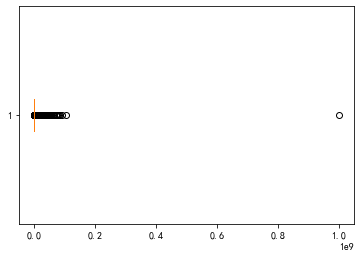

In [7]:
x=customer_info['总贷款']
plt.boxplot(x,vert=False)
plt.show() #存在显著异常值

In [8]:
boxrange=x.quantile(0.75)-x.quantile(0.25)
customer_info=customer_info[customer_info['总贷款']<=x.mean()+1.5*boxrange]

## 特征工程

In [10]:
customer_info2=customer_info.loc[:,['品牌','工作类型','骑车销售商','车厂','地区']]
customer_info2                                   

,品牌,工作类型,骑车销售商,车厂,地区
0,136,0,20490,45,8
2,5,1,15663,86,9
3,76,0,17242,48,8
5,152,0,14470,51,3
6,34,1,16556,86,6
...,...,...,...,...,...
199710,5,1,16817,48,9
199711,13,1,14614,86,8
199713,34,0,15142,86,6
199715,74,1,16846,45,4


In [83]:
customer_info.columns

Index(['已发货款', '资产成本', '贷款与资产比列', '品牌', '骑车销售商', '车厂', '出生日期', '地区', '对接员工编号',
       '是否填写手机号', '受否填写身份证', '是否出具驾驶证', '是否填写护照', '信用评分', '主账户贷款次数',
       '主账户有效贷款次数', '主账户中尚未还清有效贷款', '主账户中已批准的贷款', '主账户中已发放贷款', '次账户贷款次数',
       '次账户有效贷款次数', '次账户中尚未还清有效贷款', '次账户中已批准贷款', '次账户中已发放贷款', '主账户每月还款',
       '次账户没用还款', '近六个月新贷款次数', '近六个月违约次数', '平均贷款期限', '第一次贷款距今时间', '贷款查询次数',
       '是否违约', '贷款与资产比', '贷款总次数', '主账户无效贷款次数', '次账户无效贷款次数', '无效贷款总次数',
       '尚未还清有效贷款总额', '已批准贷款总额', '已发放贷款总额', '每月还款总额', '贷款与已还贷款比列', '主账户还款期数',
       '次账户还款期数', '贷款与已批准贷款比列', '总贷款次数与总有效贷款次数比', '工作类型', '总贷款'],
      dtype='object')

In [82]:
#customer_info.drop('客户编号',axis=1,inplace=True)
customer_info.drop('货款日期',axis=1,inplace=True)

Chi_Square value=1889.1045, p-value=0.0000, degree of freedom=81 expected_frep=[[3.72421217e+03 8.42787831e+02]
 [7.81538196e+03 1.76861804e+03]
 [5.35187310e+03 1.21112690e+03]
 [5.29397535e+03 1.19802465e+03]
 [2.10144400e+03 4.75555997e+02]
 [1.96200011e+03 4.43999895e+02]
 [1.63663101e+03 3.70368990e+02]
 [2.72364104e+03 6.16358956e+02]
 [3.02291537e+03 6.84084626e+02]
 [1.58688787e+03 3.59112134e+02]
 [9.36149676e+02 2.11850324e+02]
 [1.71980807e+03 3.89191928e+02]
 [4.03245658e+03 9.12543425e+02]
 [7.07820487e+02 1.60179513e+02]
 [3.03922460e+03 6.87775398e+02]
 [3.34420716e+03 7.56792838e+02]
 [2.73505750e+03 6.18942497e+02]
 [1.02177312e+03 2.31226878e+02]
 [4.44263365e+03 1.00536635e+03]
 [3.84897776e+02 8.71022238e+01]
 [5.37389056e+03 1.21610944e+03]
 [1.76058114e+03 3.98418858e+02]
 [3.02536176e+02 6.84638242e+01]
 [2.96501762e+03 6.70982385e+02]
 [2.85900763e+03 6.46992366e+02]
 [3.80005008e+02 8.59949921e+01]
 [1.28190531e+03 2.90094694e+02]
 [9.58167134e+02 2.16832866e+0

Text(0.5, 1.0, '品牌违约率')

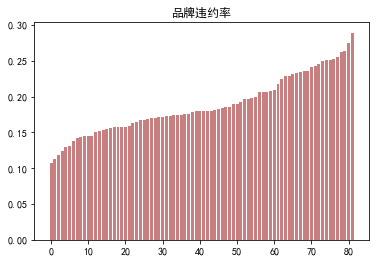

In [12]:
df=pd.DataFrame(pd.pivot_table(customer_info,values='总贷款',index='品牌',columns='是否违约',aggfunc='count'))
kf=chi2_contingency(df)
print('Chi_Square value=%.4f, p-value=%.4f, degree of freedom=%i expected_frep=%s'%kf)
df['percentage']=df[1]/(df[0]+df[1])
df.sort_values(by='percentage',axis=0,inplace=True)
x=range(82)
_=plt.bar(x,height=df['percentage'],alpha=0.6,color='brown')
plt.title('品牌违约率')

Chi_Square value=257.1266, p-value=0.0000, degree of freedom=9 expected_frep=[[3.48838074e+04 7.89419265e+03]
 [1.01810355e+04 2.30396454e+03]
 [6.39240184e+03 1.44659816e+03]
 [1.60499111e+04 3.63208892e+03]
 [1.25662600e+03 2.84373998e+02]
 [6.50134748e+04 1.47125252e+04]
 [5.49620977e+03 1.24379023e+03]
 [4.30563614e+02 9.74363859e+01]
 [1.63092278e+00 3.69077219e-01]
 [7.33915251e+00 1.66084749e+00]]


Text(0.5, 1.0, '车厂违约率')

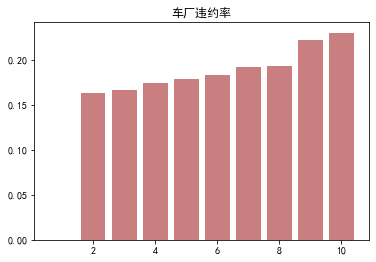

In [13]:
df=pd.DataFrame(pd.pivot_table(customer_info,values='总贷款',index='车厂',columns='是否违约',aggfunc='count'))
df.fillna(0,inplace=True)
kf=chi2_contingency(df)
print('Chi_Square value=%.4f, p-value=%.4f, degree of freedom=%i expected_frep=%s'%kf)
df['percentage']=df[1]/(df[0]+df[1])
df.sort_values(by='percentage',axis=0,inplace=True)
x=range(1,11)
plt.bar(x,height=df['percentage'],alpha=0.6,color='brown')
plt.title('车厂违约率')

Chi_Square value=113.6486, p-value=0.0000, degree of freedom=2 expected_frep=[[75869.71229207 17169.28770793]
 [58859.18769042 13319.81230958]
 [ 4984.10001751  1127.89998249]]


Text(0.5, 1.0, '工作类型违约率')

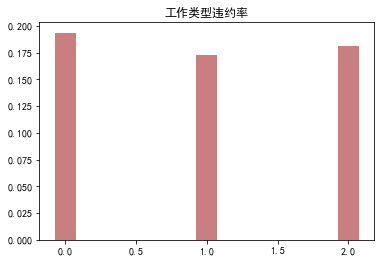

In [75]:
df=pd.DataFrame(pd.pivot_table(customer_info,values='总贷款',index='工作类型',columns='是否违约',aggfunc='count'))
df.fillna(0,inplace=True)
kf=chi2_contingency(df)
print('Chi_Square value=%.4f, p-value=%.4f, degree of freedom=%i expected_frep=%s'%kf)
df['percentage']=df[1]/(df[0]+df[1])
df.sort_values(by='percentage',axis=0,inplace=True)
plt.bar(df.index,height=df['percentage'],alpha=0.6,color='brown',width=0.15)
plt.title('工作类型违约率')

Chi_Square value=1064.1242, p-value=0.0000, degree of freedom=21 expected_frep=[[5.18062621e+03 1.17237379e+03]
 [2.47329440e+03 5.59705603e+02]
 [2.22033827e+04 5.02461726e+03]
 [2.64323655e+04 5.98163449e+03]
 [6.35733700e+03 1.43866300e+03]
 [1.94601706e+04 4.40382938e+03]
 [4.17760870e+03 9.45391297e+02]
 [7.64005777e+03 1.72894223e+03]
 [9.17149426e+03 2.07550574e+03]
 [2.28410735e+03 5.16892646e+02]
 [3.81065108e+03 8.62348923e+02]
 [2.75136673e+03 6.22633269e+02]
 [1.09304445e+04 2.47355552e+03]
 [5.81913248e+03 1.31686752e+03]
 [2.95115477e+03 6.67845229e+02]
 [1.49718711e+03 3.38812887e+02]
 [2.46350886e+03 5.57491140e+02]
 [3.24227449e+03 7.33725512e+02]
 [6.24643425e+02 1.41356575e+02]
 [1.23950131e+02 2.80498687e+01]
 [7.99152162e+01 1.80847838e+01]
 [3.83266853e+01 8.67331466e+00]]


Text(0.5, 1.0, '地区违约率')

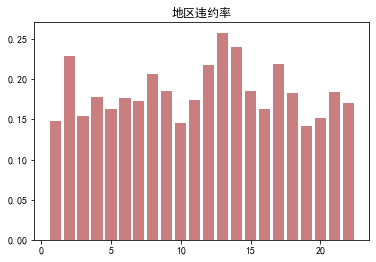

In [80]:
df=pd.DataFrame(pd.pivot_table(customer_info,values='总贷款',index='地区',columns='是否违约',aggfunc='count'))
df.fillna(0,inplace=True)
kf=chi2_contingency(df)
print('Chi_Square value=%.4f, p-value=%.4f, degree of freedom=%i expected_frep=%s'%kf)
df['percentage']=df[1]/(df[0]+df[1])
df.sort_values(by='percentage',axis=0,inplace=True)
plt.bar(df.index,height=df['percentage'],alpha=0.6,color='brown')
plt.title('地区违约率')

Chi_Square value=7064.0145, p-value=0.0000, degree of freedom=2911 expected_frep=[[ 4.89276834  1.10723166]
 [ 1.63092278  0.36907722]
 [27.72568727  6.27431273]
 ...
 [ 1.63092278  0.36907722]
 [ 1.63092278  0.36907722]
 [ 1.63092278  0.36907722]]


Text(0.5, 1.0, '骑车销售商违约率')

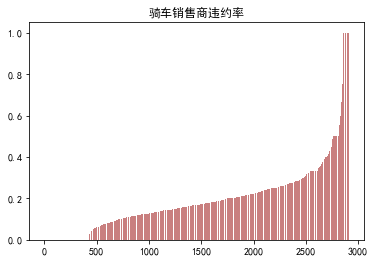

In [87]:
df=pd.DataFrame(pd.pivot_table(customer_info,values='总贷款',index='骑车销售商',columns='是否违约',aggfunc='count'))
df.fillna(0,inplace=True)
kf=chi2_contingency(df)
print('Chi_Square value=%.4f, p-value=%.4f, degree of freedom=%i expected_frep=%s'%kf)
df['percentage']=df[1]/(df[0]+df[1])
df.sort_values(by='percentage',axis=0,inplace=True)
x=range(2912)
plt.bar(x,height=df['percentage'],alpha=0.6,color='brown')
plt.title('骑车销售商违约率')

## 特征工程（连续变量）

{'whiskers': [<matplotlib.lines.Line2D at 0x219904ae0c8>,
 'caps': [<matplotlib.lines.Line2D at 0x219904ae648>,
 'boxes': [<matplotlib.lines.Line2D at 0x219904ab708>],
 'medians': [<matplotlib.lines.Line2D at 0x219900cc148>],
 'fliers': [<matplotlib.lines.Line2D at 0x219904aed48>],
 'means': []}

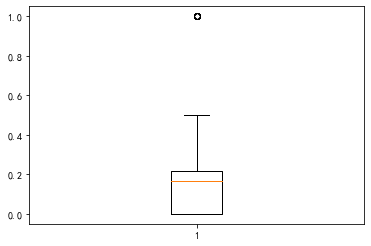

In [14]:
stats.ttest_ind(customer_info.主账户贷款次数[customer_info['是否违约']==1],customer_info.主账户贷款次数[customer_info['是否违约']==0])
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['主账户贷款次数'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2198d91a8c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2198d91a7c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2198d91a2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2198daafec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2198d4e3f88>],
 'means': []}

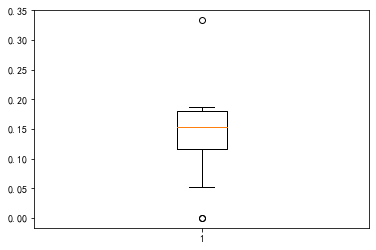

In [15]:
stats.ttest_ind(customer_info.主账户有效贷款次数[customer_info['是否违约']==1],customer_info.主账户有效贷款次数[customer_info['是否违约']==0])
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['主账户有效贷款次数'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])

In [109]:
customer_info.columns

Index(['已发货款', '资产成本', '贷款与资产比列', '品牌', '骑车销售商', '车厂', '出生日期', '地区', '对接员工编号',
       '是否填写手机号', '受否填写身份证', '是否出具驾驶证', '是否填写护照', '信用评分', '主账户贷款次数',
       '主账户有效贷款次数', '主账户中尚未还清有效贷款', '主账户中已批准的贷款', '主账户中已发放贷款', '次账户贷款次数',
       '次账户有效贷款次数', '次账户中尚未还清有效贷款', '次账户中已批准贷款', '次账户中已发放贷款', '主账户每月还款',
       '次账户没用还款', '近六个月新贷款次数', '近六个月违约次数', '平均贷款期限', '第一次贷款距今时间', '贷款查询次数',
       '是否违约', '贷款与资产比', '贷款总次数', '主账户无效贷款次数', '次账户无效贷款次数', '无效贷款总次数',
       '尚未还清有效贷款总额', '已批准贷款总额', '已发放贷款总额', '每月还款总额', '贷款与已还贷款比列', '主账户还款期数',
       '次账户还款期数', '贷款与已批准贷款比列', '总贷款次数与总有效贷款次数比', '工作类型', '总贷款'],
      dtype='object')

Ttest_indResult(statistic=0.3162069108194927, pvalue=0.7518458478044048)

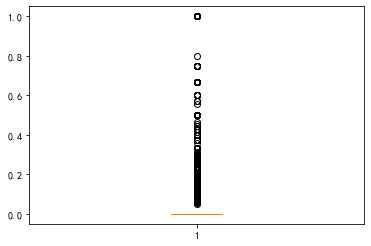

In [111]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['主账户中尚未还清有效贷款'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])
stats.ttest_ind(customer_info.主账户中尚未还清有效贷款[customer_info['是否违约']==1],customer_info.主账户中尚未还清有效贷款[customer_info['是否违约']==0])

Ttest_indResult(statistic=-6.881290616670317, pvalue=5.951519874178259e-12)

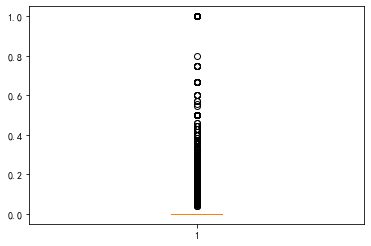

In [112]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['主账户中已批准的贷款'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])
stats.ttest_ind(customer_info.主账户中已批准的贷款[customer_info['是否违约']==1],customer_info.主账户中已批准的贷款[customer_info['是否违约']==0])

Ttest_indResult(statistic=-5.313115768687635, pvalue=1.0790066222428943e-07)

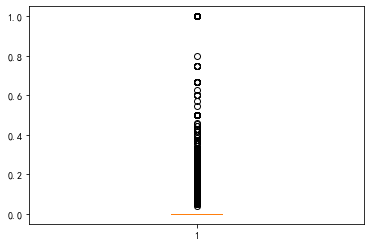

In [113]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['主账户中已发放贷款'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])
stats.ttest_ind(customer_info.主账户中已发放贷款[customer_info['是否违约']==1],customer_info.主账户中已发放贷款[customer_info['是否违约']==0])

Ttest_indResult(statistic=-1.075839019746673, pvalue=0.2820007730095898)

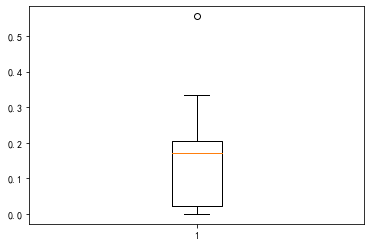

In [114]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['次账户贷款次数'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])
stats.ttest_ind(customer_info.次账户贷款次数[customer_info['是否违约']==1],customer_info.次账户贷款次数[customer_info['是否违约']==0])

Ttest_indResult(statistic=-4.519337020015357, pvalue=6.207498387868622e-06)

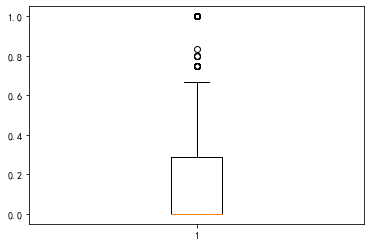

In [115]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['主账户每月还款'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])
stats.ttest_ind(customer_info.主账户每月还款[customer_info['是否违约']==1],customer_info.主账户每月还款[customer_info['是否违约']==0])

Ttest_indResult(statistic=0.3596379411594508, pvalue=0.7191183497417198)

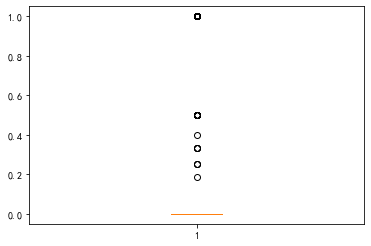

In [117]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['次账户没用还款'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])
stats.ttest_ind(customer_info.次账户没用还款[customer_info['是否违约']==1],customer_info.次账户没用还款[customer_info['是否违约']==0])

Ttest_indResult(statistic=-6.195655167911387, pvalue=5.817443845601251e-10)

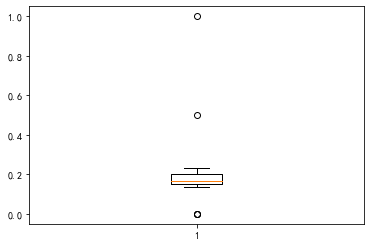

In [119]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['近六个月新贷款次数'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])
stats.ttest_ind(customer_info.近六个月新贷款次数[customer_info['是否违约']==1],customer_info.近六个月新贷款次数[customer_info['是否违约']==0])

Ttest_indResult(statistic=19.25172860188281, pvalue=1.6696457450525643e-82)

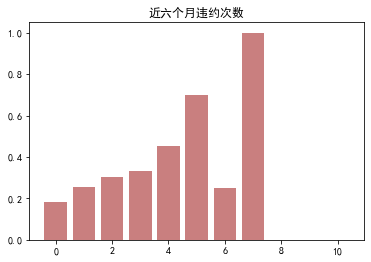

In [56]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['近六个月违约次数'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.bar(x=df.index,height=df['percentage'],alpha=0.6,color='brown')
plt.title('近六个月违约次数')
stats.ttest_ind(customer_info.近六个月违约次数[customer_info['是否违约']==1],customer_info.近六个月违约次数[customer_info['是否违约']==0])

Ttest_indResult(statistic=-2.786980412615744, pvalue=0.005320754820646361)

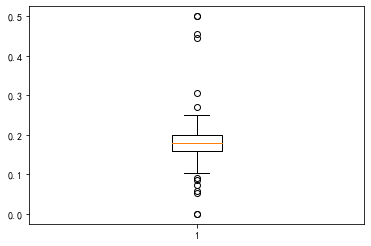

In [124]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['平均贷款期限'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])
stats.ttest_ind(customer_info.平均贷款期限[customer_info['是否违约']==1],customer_info.平均贷款期限[customer_info['是否违约']==0])

Ttest_indResult(statistic=-4.283103495405598, pvalue=1.8440459816905007e-05)

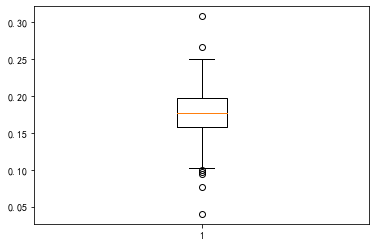

In [126]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['第一次贷款距今时间'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.boxplot(df['percentage'])
stats.ttest_ind(customer_info.第一次贷款距今时间[customer_info['是否违约']==1],customer_info.第一次贷款距今时间[customer_info['是否违约']==0])

Ttest_indResult(statistic=18.05710511715943, pvalue=8.106778044723715e-73)

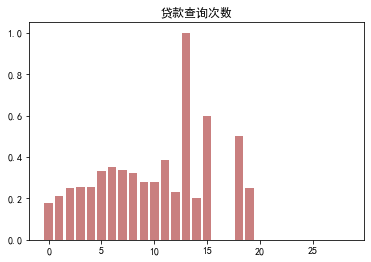

In [57]:
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['贷款查询次数'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.bar(x=df.index,height=df['percentage'],alpha=0.6,color='brown')
plt.title('贷款查询次数')
stats.ttest_ind(customer_info.贷款查询次数[customer_info['是否违约']==1],customer_info.贷款查询次数[customer_info['是否违约']==0])

Ttest_indResult(statistic=41.29779378987618, pvalue=0.0)

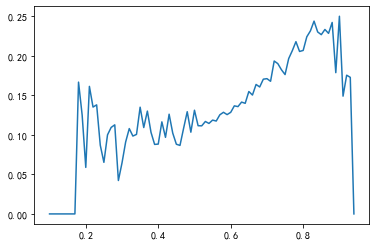

In [155]:
customer_info=customer_info.round({'贷款与资产比':2})
df=pd.crosstab(columns=customer_info['是否违约'],index=customer_info['贷款与资产比'],values='总贷款',aggfunc='count')
df.fillna(0,inplace=True)
df['percentage']=df[1]/(df[0]+df[1])
plt.plot(df['percentage'])
stats.ttest_ind(customer_info.贷款与资产比[customer_info['是否违约']==1],customer_info.贷款与资产比[customer_info['是否违约']==0])

In [16]:
def t_test(num):
    result=stats.ttest_ind(customer_info.iloc[:,num][customer_info['是否违约']==1],customer_info.iloc[:,num][customer_info['是否违约']==0])
    return result

In [40]:
feature=[]
for i in range(1,3):
    if t_test(i)[1]<0.05:
        feature.append(customer_info.columns[i])
        print(t_test(i)[1],customer_info.columns[i])

1.36300778159218e-217 已发货款
0.0004069522291713766 资产成本


In [31]:
feature=[]
for i in range(7,49):
    if t_test(i)[1]<0.05:
        feature.append(customer_info.columns[i])
        print(t_test(i)[1],customer_info.columns[i])

2.436407425018745e-25 出生日期
6.145257024797942e-87 地区
8.40568514553645e-16 对接员工编号
0.001777571044258321 是否出具驾驶证
4.855946271468169e-45 信用评分
0.0002478917895316869 主账户贷款次数
4.642872030982188e-07 主账户有效贷款次数
5.951519874178259e-12 主账户中已批准的贷款
1.0790066222428943e-07 主账户中已发放贷款
6.207498387868622e-06 主账户每月还款
5.817443845601251e-10 近六个月新贷款次数
1.6696457450525643e-82 近六个月违约次数
0.005320754820646361 平均贷款期限
1.8440459816905007e-05 第一次贷款距今时间
8.106778044723715e-73 贷款查询次数
0.0 是否违约
0.0 贷款与资产比
0.00018904509711393909 贷款总次数
0.013650294479529061 主账户无效贷款次数
0.010911418685721923 无效贷款总次数
3.9500246729397625e-12 已批准贷款总额
9.540526725448663e-08 已发放贷款总额
9.532431330750415e-06 每月还款总额
9.584051932854667e-23 主账户还款期数
2.0818349217454664e-21 工作类型


In [38]:
customer_info.columns

Index(['客户编号', '已发货款', '资产成本', '贷款与资产比列', '品牌', '骑车销售商', '车厂', '出生日期', '货款日期',
       '地区', '对接员工编号', '是否填写手机号', '受否填写身份证', '是否出具驾驶证', '是否填写护照', '信用评分',
       '主账户贷款次数', '主账户有效贷款次数', '主账户中尚未还清有效贷款', '主账户中已批准的贷款', '主账户中已发放贷款',
       '次账户贷款次数', '次账户有效贷款次数', '次账户中尚未还清有效贷款', '次账户中已批准贷款', '次账户中已发放贷款',
       '主账户每月还款', '次账户没用还款', '近六个月新贷款次数', '近六个月违约次数', '平均贷款期限', '第一次贷款距今时间',
       '贷款查询次数', '是否违约', '贷款与资产比', '贷款总次数', '主账户无效贷款次数', '次账户无效贷款次数',
       '无效贷款总次数', '尚未还清有效贷款总额', '已批准贷款总额', '已发放贷款总额', '每月还款总额', '贷款与已还贷款比列',
       '主账户还款期数', '次账户还款期数', '贷款与已批准贷款比列', '总贷款次数与总有效贷款次数比', '工作类型', '总贷款'],
      dtype='object')

In [32]:
customer_info3=pd.concat([customer_info.loc[:,feature],customer_info2],axis=1)
customer_info3

,出生日期,地区,对接员工编号,是否出具驾驶证,信用评分,主账户贷款次数,主账户有效贷款次数,主账户中已批准的贷款,主账户中已发放贷款,主账户每月还款,...,已批准贷款总额,已发放贷款总额,每月还款总额,主账户还款期数,工作类型,品牌,工作类型,骑车销售商,车厂,地区
0,1981,8,2801,0,0,0,0,0,0,0,...,0,0,0,0,0,136,0,20490,45,8
2,1977,9,1032,0,0,0,0,0,0,0,...,0,0,0,0,1,5,1,15663,86,9
3,1995,8,220,0,763,1,1,13813,13813,0,...,13813,13813,0,13813,0,76,0,17242,48,8
5,1993,3,912,0,749,2,1,17700,17700,1475,...,17700,17700,1475,11,0,152,0,14470,51,3
6,1971,6,1885,0,300,3,1,100000,100000,3207,...,100000,100000,3207,31,1,34,1,16556,86,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199710,1995,9,2636,0,0,0,0,0,0,0,...,0,0,0,0,1,5,1,16817,48,9
199711,1976,8,822,0,726,22,7,214103,214103,354750,...,214103,214103,354750,0,1,13,1,14614,86,8
199713,1985,6,1641,0,0,0,0,0,0,0,...,0,0,0,0,0,34,0,15142,86,6
199715,1983,4,306,0,0,0,0,0,0,0,...,0,0,0,0,1,74,1,16846,45,4


In [41]:
customer_info3=pd.concat([customer_info.loc[:,feature],customer_info3],axis=1)
customer_info3

,已发货款,资产成本,出生日期,地区,对接员工编号,是否出具驾驶证,信用评分,主账户贷款次数,主账户有效贷款次数,主账户中已批准的贷款,...,已批准贷款总额,已发放贷款总额,每月还款总额,主账户还款期数,工作类型,品牌,工作类型,骑车销售商,车厂,地区
0,65532,78990,1981,8,2801,0,0,0,0,0,...,0,0,0,0,0,136,0,20490,45,8
2,58413,67960,1977,9,1032,0,0,0,0,0,...,0,0,0,0,1,5,1,15663,86,9
3,72317,99750,1995,8,220,0,763,1,1,13813,...,13813,13813,0,13813,0,76,0,17242,48,8
5,63882,79605,1993,3,912,0,749,2,1,17700,...,17700,17700,1475,11,0,152,0,14470,51,3
6,54013,62371,1971,6,1885,0,300,3,1,100000,...,100000,100000,3207,31,1,34,1,16556,86,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199710,65489,113590,1995,9,2636,0,0,0,0,0,...,0,0,0,0,1,5,1,16817,48,9
199711,63447,73701,1976,8,822,0,726,22,7,214103,...,214103,214103,354750,0,1,13,1,14614,86,8
199713,52303,72677,1985,6,1641,0,0,0,0,0,...,0,0,0,0,0,34,0,15142,86,6
199715,54509,71921,1983,4,306,0,0,0,0,0,...,0,0,0,0,1,74,1,16846,45,4


In [72]:
l1 =list(map(lambda x: variance_inflation_factor(X.values, x),range(X.shape[1]))) 
for m in l1:
    if m<=10:
        print(m)

1.02495185638923
2.654897631533559
2.7029622154772834
1.834054982138332
1.1415223779352466
1.7429420617376636
1.2062877265126442
2.0670114702381395
1.0995704900480396
1.586747770891285
2.18967942193429


In [43]:
from sklearn.decomposition import PCA

In [44]:
X=customer_info3.drop('是否违约',axis=1)
Y=customer_info3.loc[:,'是否违约']


[5.68722266e-01 3.03056102e-01 1.04741764e-01 2.18166153e-02
 1.65057591e-03 1.19462720e-05 6.37456583e-07 6.52401426e-08
 1.65737344e-08 1.03615169e-08 1.30710904e-09 6.81999912e-11
 4.43379657e-11 8.66677993e-12 2.96114547e-12 1.39670512e-12]


<BarContainer object of 16 artists>

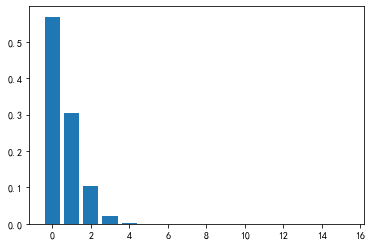

In [71]:
pca=PCA(n_components=16)
pca.fit(X)
print(pca.explained_variance_ratio_)
x=range(16)
plt.bar(x,height=pca.explained_variance_ratio_)

In [239]:
pca.explained_variance_ratio_.cumsum()

array([0.72744349, 0.94470229, 0.98739574, 0.99360554, 0.99822232,
       0.99920383, 0.99981116, 0.99999536, 0.99999972, 0.99999996,
       0.99999998, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

<AxesSubplot:>

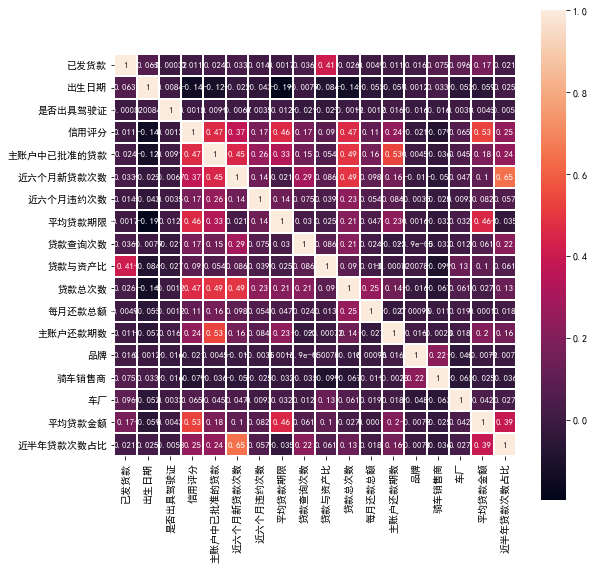

In [77]:
import seaborn as sns
plt.figure(figsize=(9, 9))
sns.heatmap(X.corr(),linewidths=0.1, linecolor='w',
            annot=True,annot_kws={'size':9},square=True)

In [66]:
# X.drop('主账户无效贷款次数',axis=1,inplace=True)
# X.drop('无效贷款总次数',axis=1,inplace=True)
# X.drop('已批准贷款总额',axis=1,inplace=True)
# X.drop('工作类型',axis=1,inplace=True)
# X.drop('主账户贷款次数',axis=1,inplace=True)
# X.drop('已发放贷款总额',axis=1,inplace=True)
# X.drop('第一次贷款距今时间',axis=1,inplace=True)
# X.drop('主账户有效贷款次数',axis=1,inplace=True)
# X.drop('资产成本',axis=1,inplace=True)
#X.drop('主账户每月还款',axis=1,inplace=True)
#X.drop('主账户中已发放贷款',axis=1,inplace=True)

In [74]:
X

,已发货款,出生日期,是否出具驾驶证,信用评分,主账户中已批准的贷款,近六个月新贷款次数,近六个月违约次数,平均贷款期限,贷款查询次数,贷款与资产比,贷款总次数,每月还款总额,主账户还款期数,品牌,骑车销售商,车厂
0,65532,1981,0,0,0,0,0,0,0,0.829624,0,0,0,136,20490,45
2,58413,1977,0,0,0,0,0,0,0,0.859520,0,0,0,5,15663,86
3,72317,1995,0,763,13813,0,0,25,0,0.724982,1,0,13813,76,17242,48
5,63882,1993,0,749,17700,1,0,13,0,0.802487,2,1475,11,152,14470,51
6,54013,1971,0,300,100000,0,0,17,0,0.865995,3,3207,31,34,16556,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199710,65489,1995,0,0,0,0,0,0,0,0.576538,0,0,0,5,16817,48
199711,63447,1976,0,726,214103,5,0,12,0,0.860870,22,354750,0,13,14614,86
199713,52303,1985,0,0,0,0,0,0,0,0.719664,0,0,0,34,15142,86
199715,54509,1983,0,0,0,0,0,0,0,0.757901,0,0,0,74,16846,45


# 衍生字段

In [76]:
X['平均贷款金额']=np.where(X['贷款总次数']==0,0,round(X['已发货款']/X['贷款总次数'],1))
X['近半年贷款次数占比']=np.where(X['贷款总次数']==0,0,round(X['近六个月新贷款次数']/X['贷款总次数'],2))
#X['平均每期还款']=np.where(X['贷款总次数']==0,0,round(X['已发放贷款总额']/(X['平均贷款期限']/X['贷款总次数']),2))

In [359]:
X['平均每期还款']=X['平均每期还款'].fillna(0)

# 建立模型 

In [78]:
import os
import time

# 模型处理模块
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 常规模型
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# 集成学习和stacking模型
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

# 评价标准模块
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,precision_score, classification_report

In [79]:
data=pd.concat([X,Y],axis=1)
for i in data.columns:
    if data[i].dtype == np.float64:
        data[i] = data[i].astype("float32")

In [80]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.是否违约,test_size=0.3)

In [95]:
def train_model(X_train, y_train, X_test, y_test, model,model_name):
    
    print('训练{}'.format(model_name))
    
    clf=model 
    start = time.time()
    
    #训练模型
    clf.fit(X_train, y_train.values.ravel())
    
    print("训练集评估")
    train_pre = clf.predict(X_train) 
    print(classification_report(y_train,train_pre))
    
    print("检验集评估")
    test_pre=clf.predict(X_test)
    print(classification_report(y_test,test_pre))
    
    
    end = time.time()
    duration = end - start
    print('模型训练耗时：{:6f}s'.format(duration))
    return clf

In [96]:
model_name_param_dict = { 'LR':(LogisticRegression()),
                          'DT': (DecisionTreeClassifier()),
                          'AdaBoost': (AdaBoostClassifier()),
                          'RF': (RandomForestClassifier())                      
                         }
result = {}
for model_name, model in model_name_param_dict.items():
    result[model_name] = train_model(X_train, y_train, X_test, y_test, model,model_name)


训练LR
训练集评估
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     97736
           1       0.14      0.00      0.00     22195

    accuracy                           0.81    119931
   macro avg       0.48      0.50      0.45    119931
weighted avg       0.69      0.81      0.73    119931

检验集评估
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     41977
           1       0.11      0.00      0.00      9422

    accuracy                           0.82     51399
   macro avg       0.46      0.50      0.45     51399
weighted avg       0.69      0.82      0.73     51399

模型训练耗时：1.954772s
训练DT
训练集评估
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97736
           1       1.00      1.00      1.00     22195

    accuracy                           1.00    119931
   macro avg       1.00      1.00      1.00    119931
weighted avg       1.00      

In [83]:
result

{'LR': LogisticRegression(),
 'DT': DecisionTreeClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'RF': RandomForestClassifier()}

In [373]:
param_grid = {'n_estimators': [20,50,100,150],"learning_rate":[0.9,1,1.1],
             "algorithm": ["SAMME.R", "SAMME"],"random_state": [50,100,150,200]},
model = AdaBoostClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
temp=grid_search.fit(X_train, y_train)
temp.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.1,
 'n_estimators': 150,
 'random_state': 50}

In [1]:
# param_grid2 = {'penalty': ['l1','l2'],"max_iter":[100,80,120],
#              "C": [1,0.1,10],"random_state": [50,100,150,200]},
# model2 = LogisticRegression()
# grid_search2 = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
# temp2=grid_search.fit(X_train, y_train)
# temp2.best_params_

NameError: name 'LogisticRegression' is not defined

In [98]:
#优质模型保存
import joblib
#保存模型
#joblib.dump(temp,'model.pkl')


In [107]:
clf=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.1,n_estimators=150,random_state=50)
clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1.1, n_estimators=150, random_state=50)

In [100]:
import joblib
joblib.load("model.pkl")

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid=({'algorithm': ['SAMME.R', 'SAMME'],
                          'learning_rate': [0.9, 1, 1.1],
                          'n_estimators': [20, 50, 100, 150],
                          'random_state': [50, 100, 150, 200]},),
             scoring='roc_auc')

In [108]:
clf.score(X_test,y_test)

0.8162415611198661